In [2]:
import numpy as np
import matplotlib.pyplot as plt

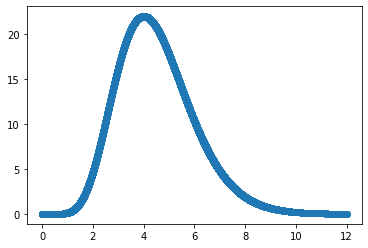

In [13]:
# Consider (unnormalized) Gamma density with shape parameter 9 and scale parameter 1/2
# Support is (0, inf) but image restricts to (0, 12)

gamma_shape = 9
gamma_scale = 0.5

# Evaluate unnormalized or normalized gamma density with the specified parameters; vectorized.
def gamma(x, normalize = False):
    f = np.power(x, gamma_shape - 1) * np.exp(-2 * x)
    if normalize:
        f = f / (np.prod(np.arange(start = 1, stop = 9)) * (.5)**9)
        
    return f

num_x_samples = 10000
x_vals = np.arange(0, 12, step = 12 / num_x_samples)
plt.scatter(x = x_vals, 
            y = gamma(x_vals))
plt.show()


M =  22.0


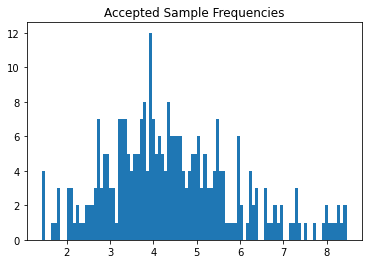

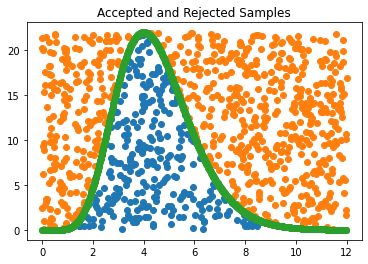

Fraction accepted (empirical):  0.297
Approx Probability of acceptence (theoretical):  0.299
Likelihood:  3.375793769924633e-231


In [17]:
# Basic Accept-Reject reject algorithm with constant upper bound. Here we consider the upper 
# bound M on the truncated support [0, 12]. Thus, no samples will be generated on (12, inf). 
# Since very little of the probability mass occurs on this interval, the method should provide 
# a reasonable approximation. 

# Maximum occurs at x = 4
M = np.ceil(gamma(4))
print("M = ", M)

# Support upper bound
support_bound = 12

# Rejection sampling
accepted_samples = []
rejected_samples = []
num_iter = 1000

for i in range(num_iter):
    x = np.random.uniform(0, support_bound)
    u = np.random.uniform(0, 1)
    if u < gamma(x) / M:
        accepted_samples.append((x, u))
    else:
        rejected_samples.append((x, u))
        
x_samples = np.array([sample[0] for sample in accepted_samples])
        
# Plot results
plt.hist(x_samples, bins = 100)
plt.title("Accepted Sample Frequencies")
plt.show()
plt.close()

# Superimpose (x, u) sample pairs on density plot
plt.scatter(x = [sample[0] for sample in accepted_samples], 
            y = [sample[1] * M for sample in accepted_samples])
plt.scatter(x = [sample[0] for sample in rejected_samples], 
            y = [sample[1] * M for sample in rejected_samples])

num_x_samples = 1000
x_vals = np.arange(0, 12, step = 12 / num_x_samples)
plt.scatter(x = x_vals, 
            y = gamma(x_vals))
plt.title("Accepted and Rejected Samples")
plt.show()
plt.close()

# Efficiency results: note that the theoretical probability of acceptance here must account for 
# the fact that the support is being truncated. 
print("Fraction accepted (empirical): ", str(len(accepted_samples) / num_iter))
print("Approx Probability of acceptence (theoretical): ", .299)

# Accuracy results: likelihood of generated samples given known parameters
likelihood = np.prod(gamma(x_samples, normalize = True))
print("Likelihood: ", likelihood)




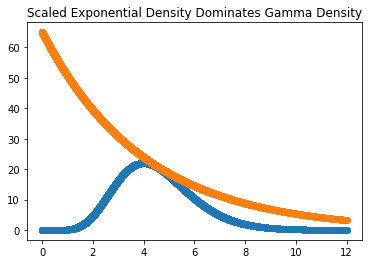

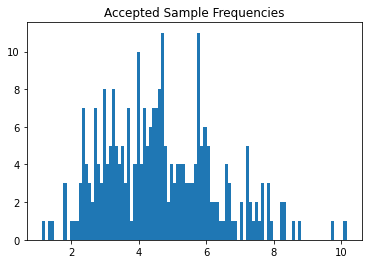

Fraction accepted (empirical):  0.272
Approx Probability of acceptence (theoretical):  0.30288
Likelihood:  1.7092435448531577e-225


In [24]:
# Accept-Reject with a marginally better proposal distribution: Exponential(rate = .25)
# and scaling factor M = 65. This algorithm has a marginally higher acceptance probability, 
# and is also marginally more accurate due to the fact that the support need not be truncated. 

# Exponential parameters
exponential_rate = .25

# Scaling factor 
M = 65

# Evaluate unnormalized or normalized Laplace density with the specified parameters; vectorized.
def exponential(x, normalize = False):
    f = np.exp(-exponential_rate * x)
    
    if normalize: 
        f = exponential_rate * f
    return f

# Visual display that scaled Exponential density dominates Gamma density.
num_x_samples = 10000
x_vals = np.arange(0, 12, step = 12 / num_x_samples)
plt.scatter(x = x_vals, y = gamma(x_vals))
plt.scatter(x = x_vals, y = M * exponential(x_vals))
plt.title("Scaled Exponential Density Dominates Gamma Density")
plt.show()
plt.close()

# Rejection sampling
accepted_samples = []
rejected_samples = []
num_iter = 1000

for i in range(num_iter):
    x = np.random.exponential(scale = 1 / exponential_rate)
    u = np.random.uniform(0, 1)
    if u < gamma(x) / (M * exponential(x)):
        accepted_samples.append((x, u))
    else:
        rejected_samples.append((x, u))
        
x_samples = np.array([sample[0] for sample in accepted_samples])

# Plot results
plt.hist(x_samples, bins = 100)
plt.title("Accepted Sample Frequencies")
plt.show()
plt.close()

# Efficiency results
print("Fraction accepted (empirical): ", str(len(accepted_samples) / num_iter))
print("Approx Probability of acceptence (theoretical): ", .30288)

# Accuracy results: likelihood of generated samples given known parameters
likelihood = np.prod(gamma(x_samples, normalize = True))
print("Likelihood: ", likelihood)
